<a href="https://colab.research.google.com/github/Enkhzol/diveintocode-ml/blob/master/diver_class_assignment9_ML_QuestionOfGoingDownMt_Fuji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
#csv_path = "/content/sample_data/mtfuji_data.csv" # Specify the file name (path)
csv_path = "/mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]


**[Problem 1] Visualization of data**

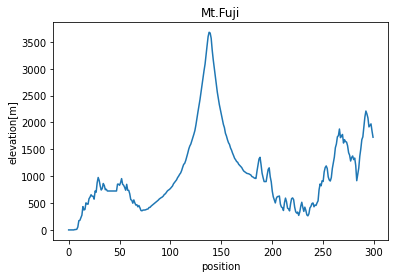

In [19]:
import matplotlib.pyplot as plt

plt.title("Mt.Fuji") 
plt.xlabel("position")
plt.ylabel("elevation[m]")
plt.plot(fuji[:,0],fuji[:, 3]) 

plt.show()

**[Problem 2] Create a function to calculate the slope of a point**

In [20]:
def compute_gradient(position, elevation):
    return elevation[position] - elevation[position-1] / 1

position = 100
elevation = fuji[:, 3]
print('At position {} has slope {}'.format(position, compute_gradient(position, elevation)))

At position 100 has slope 18.90000000000009


**[Problem 3] Create a function to calculate the destination**

In [17]:
def calculate_next_position(position, elevation, alpha=0.2):
    next_point = 0
    next_point = position - (alpha * compute_gradient(position, elevation))
    next_point = round(next_point)
    return next_point

position = 136
next_point = calculate_next_position(position, elevation)
print('The next point at {} will be {}'.format(position, next_point))

The next point at 136 will be 102


**[Problem 4] Creating a function to go down the mountain**

In [25]:
def go_down_mountain(position, elevation, alpha=0.2):
    movement = [position]
   
    while movement[-1] not in movement[:-1]:
        movement.append(calculate_next_position(movement[-1], elevation, alpha))
    
    return movement

position = 136

movement = go_down_mountain(position, elevation)

print('movement {}, From position {}'.format(movement,position))

movement [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75], From position 136


**[Problem 5] Visualization of the descent process**

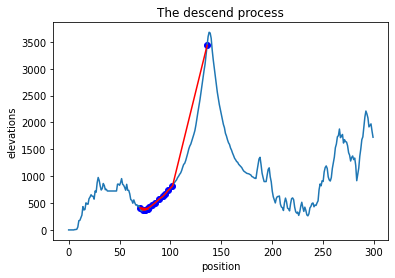

In [28]:
elevation_list = elevation[movement]

plt.title('The descend process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(movement, elevation_list, color='blue')
plt.plot(movement, elevation_list, color='red')
plt.show()

**[Problem 6] Change of initial value**

movement [150, 169, 173, 176, 177, 178, 180, 186, 164, 169], From position 150


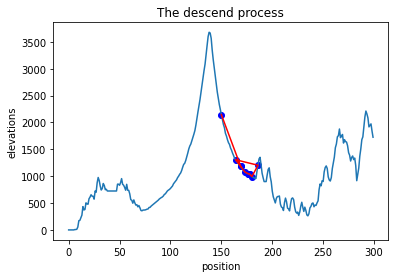

In [29]:
position = 150

movement = go_down_mountain(position, elevation)

print('movement {}, From position {}'.format(movement,position))

elevation_list = elevation[movement]

plt.title('The descend process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(movement, elevation_list, color='blue')
plt.plot(movement, elevation_list, color='red')
plt.show()

**【問題7】初期値ごとの下山過程の可視化**

movement [142, 177, 178, 180, 186, 164, 169, 173, 176, 177], From position 142


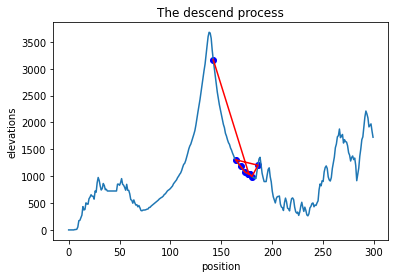

In [30]:
position = 142

movement = go_down_mountain(position, elevation)

print('movement {}, From position {}'.format(movement,position))

elevation_list = elevation[movement]

plt.title('The descend process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(movement, elevation_list, color='blue')
plt.plot(movement, elevation_list, color='red')
plt.show()

**問題8】（アドバンス問題）ハイパーパラメータの変更**

**alpha = 0.2 →　0.1**

movement [142, 160, 164, 167, 171, 175, 176, 176], From position 142


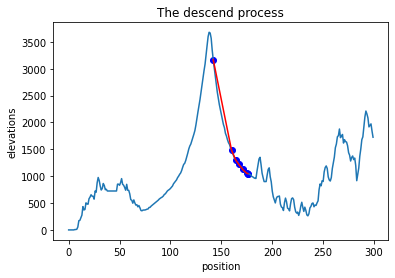

In [32]:
position = 142
alpha = 0.1

movement = go_down_mountain(position, elevation,alpha)

print('movement {}, From position {}'.format(movement,position))

elevation_list = elevation[movement]

plt.title('The descend process')
plt.xlabel('position')
plt.ylabel('elevations')
plt.plot(elevation)
plt.scatter(movement, elevation_list, color='blue')
plt.plot(movement, elevation_list, color='red')
plt.show()